# Step 3: Advanced Analysis of Customer Shopping Data

## Introduction

In this step, we dive deeper into the cleaned customer shopping dataset through data visualization, correlation analysis, segmented analysis, time-series analysis, and detailed outlier detection. The goal is to uncover trends, relationships, and insights that can inform decision-making and strategic planning.

### Objectives

1. **Data Visualization**:
   - Visualize the distribution of numerical variables (`age`, `quantity`, `price`) using histograms and boxplots.
   - Identify patterns and potential outliers in the data.

2. **Correlation Analysis**:
   - Explore the relationships between key numerical variables such as `age`, `quantity`, and `price`.

3. **Segmented Analysis**:
   - Analyze pricing trends and purchase behavior across customer segments (e.g., by `gender` and `category`).

4. **Time-Series Analysis**:
   - Evaluate monthly revenue trends to identify seasonality and peak shopping periods.

5. **Outlier Analysis**:
   - Detect and analyze outliers in the dataset, with a focus on high-value purchases.


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\Zana\Desktop\portfolio_projects\project_1\cleaned_customer_shopping_data.csv")
print(df.head())

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I337046     C189076  Female   53     Books         4    60.60   
4    I227836     C657758  Female   28  Clothing         5  1500.40   

  payment_method invoice_date   shopping_mall  
0    Credit Card   2022-08-05          Kanyon  
1     Debit Card   2021-12-12  Forum Istanbul  
2           Cash   2021-11-09       Metrocity  
3           Cash   2021-10-24          Kanyon  
4    Credit Card   2022-05-24  Forum Istanbul  


### Data Visualisation

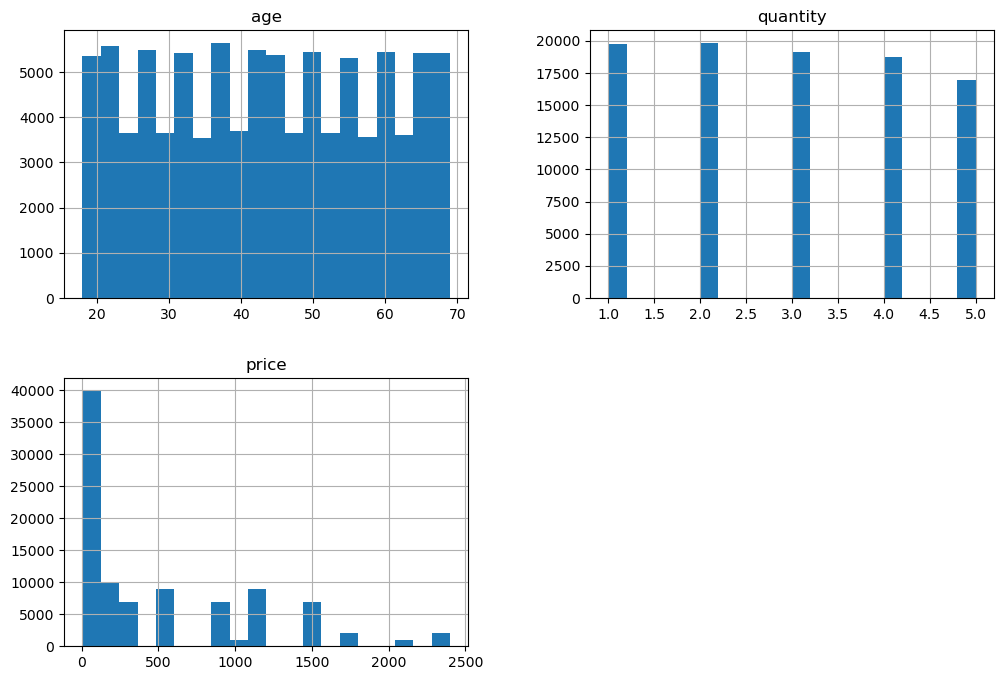

In [3]:
import matplotlib.pyplot as plt

# Plotting histograms for 'age', 'quantity', and 'price'
df[['age', 'quantity', 'price']].hist(bins=20, figsize=(12, 8))

# Show the plot
plt.show()

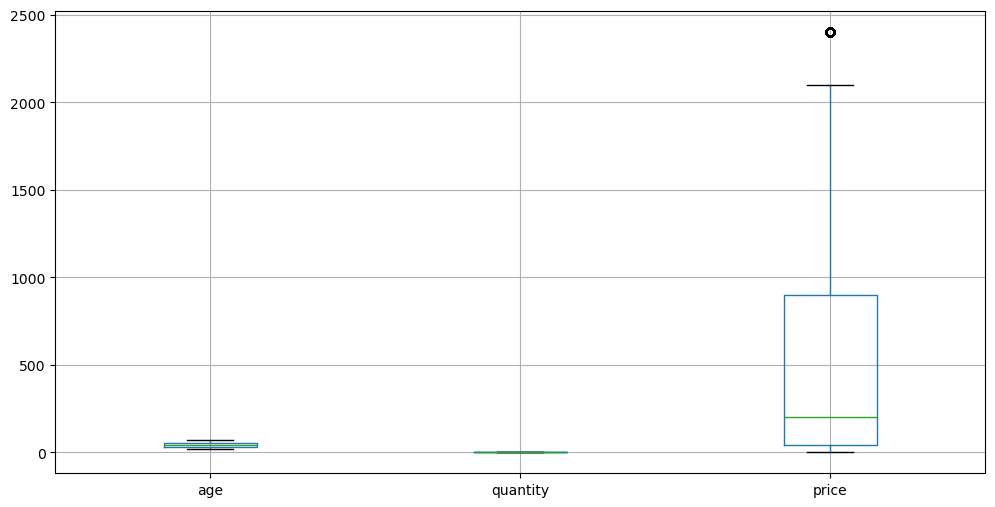

In [15]:
# Create boxplots for 'age', 'quantity', and 'price' to detect outliers
plt.figure(figsize=(12, 6))

# Create boxplot for each column
df[['age', 'quantity', 'price']].boxplot()

# Show the plot
plt.show()

### Correlation analysis

In [16]:
# Calculated the correlation matrix for 'age', 'quantity', and 'price'
correlation_matrix = df[['age', 'quantity', 'price']].corr()

# Display the correlation matrix
correlation_matrix

,age,quantity,price
age,1.000000,0.000647,0.001950
quantity,0.000647,1.000000,0.278199
price,0.001950,0.278199,1.000000


In [19]:
!pip install seaborn

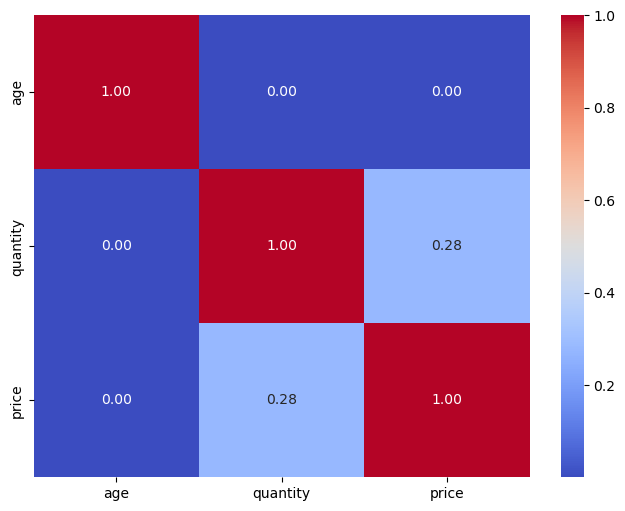

In [20]:
 import seaborn as sns

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

### Segmented Analysis by Gender or Category

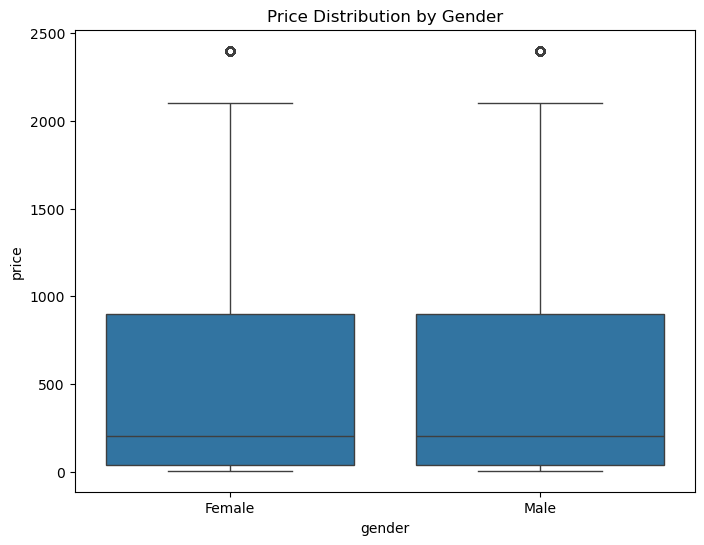

In [22]:
# Create separate boxplots for 'price' by 'gender'
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='price', data=df)
plt.title("Price Distribution by Gender")
plt.show()

In [23]:
# Group by 'category' and calculate summary statistics for 'price' and 'quantity'
df.groupby('category')[['price', 'quantity']].describe()

price                                                      \
                   count         mean         std      min      25%      50%   
category                                                                       
Books             4981.0    45.568621   21.492662    15.15    30.30    45.45   
Clothing         34487.0   901.084021  424.225594   300.08   600.16   900.24   
Cosmetics        15097.0   122.448626   57.458097    40.66    81.32   121.98   
Food & beverage  14776.0    15.671948    7.422176     5.23    10.46    15.69   
Shoes             8021.0  1507.870071  668.025797   600.17  1200.34  1800.51   
Souvenir          4999.0    34.894345   16.564498    11.73    23.46    35.19   
Technology        1985.0  1578.967254  525.117298  1050.00  1050.00  2100.00   
Toys             10087.0   107.733185   50.364844    35.84    71.68   107.52   

                                  quantity                                     \
                     75%      max    count      mean       std  min  25%  50%   
category                                                                        
Books              60.60    75.75   4981.0  3.007830  1.418658  1.0  2.0  3.0   
Clothing         1200.32  1500.40  34487.0  3.002813  1.413708  1.0  2.0  3.0   
Cosmetics         162.64   203.30  15097.0  3.011525  1.413136  1.0  2.0  3.0   
Food & beverage    20.92    26.15  14776.0  2.996548  1.419154  1.0  2.0  3.0   
Shoes            2400.68  2400.68   8021.0  2.512405  1.113061  1.0  2.0  3.0   
Souvenir           46.92    58.65   4999.0  2.974795  1.412148  1.0  2.0  3.0   
Technology       2100.00  2100.00   1985.0  1.503778  0.500112  1.0  1.0  2.0   
Toys              143.36   179.20  10087.0  3.005948  1.405269  1.0  2.0  3.0   

                           
                 75%  max  
category                   
Books            4.0  5.0  
Clothing         4.0  5.0  
Cosmetics        4.0  5.0  
Food & beverage  4.0  5.0  
Shoes            4.0  4.0  
Souvenir         4.0  5.0  
Technology       2.0  2.0  
Toys             4.0  5.0

### Time-Series Analysis (Purchase Trends Over Time)

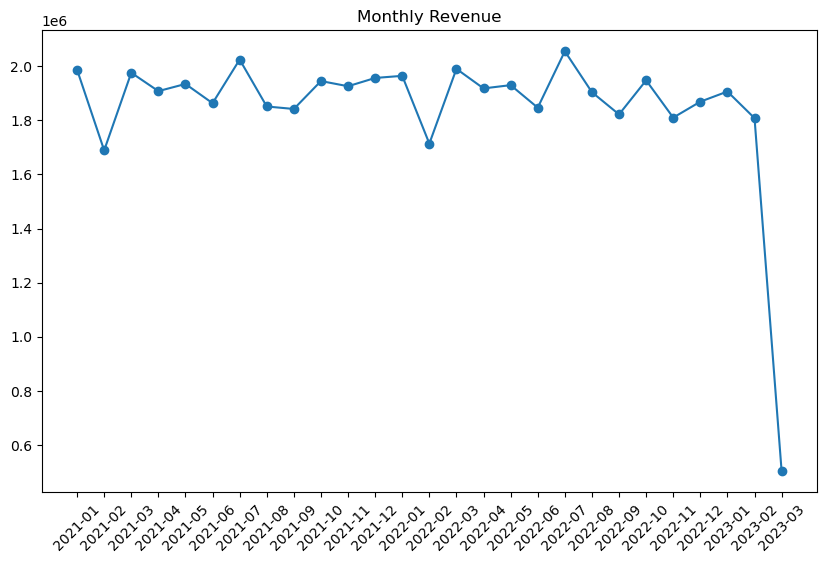

In [24]:
# Convert 'invoice_date' to datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Extract month and year from the 'invoice_date'
df['month_year'] = df['invoice_date'].dt.to_period('M')

# Group by 'month_year' and calculate total price and number of transactions
monthly_data = df.groupby('month_year').agg({'price': 'sum', 'invoice_no': 'count'}).reset_index()

# Plot monthly revenue
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['month_year'].astype(str), monthly_data['price'], marker='o')
plt.title('Monthly Revenue')
plt.xticks(rotation=45)
plt.show()

### Detailed Outlier Analysis

In [25]:
# Identify outliers in the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,month_year
24,I217053,C192344,Male,50,Shoes,4,2400.68,Cash,2022-10-10,Emaar Square Mall,2022-10
31,I167211,C164092,Female,66,Shoes,4,2400.68,Credit Card,2022-08-30,Zorlu Center,2022-08
40,I826174,C607615,Female,40,Shoes,4,2400.68,Cash,2022-06-20,Metrocity,2022-06
70,I115870,C135790,Female,69,Shoes,4,2400.68,Cash,2021-09-04,Metrocity,2021-09
234,I120948,C340089,Female,54,Shoes,4,2400.68,Debit Card,2021-08-08,Mall of Istanbul,2021-08
...,...,...,...,...,...,...,...,...,...,...,...
94085,I148164,C139153,Female,54,Shoes,4,2400.68,Credit Card,2022-12-09,Kanyon,2022-12
94197,I238516,C898771,Female,45,Shoes,4,2400.68,Credit Card,2023-02-24,Istinye Park,2023-02
94280,I301757,C719982,Female,58,Shoes,4,2400.68,Debit Card,2022-07-02,Metrocity,2022-07
94344,I751798,C250277,Female,18,Shoes,4,2400.68,Credit Card,2022-05-28,Zorlu Center,2022-05


# Summary of Analysis Results

## 1. Data Overview
- The dataset includes customer transactions with attributes like `age`, `category`, `quantity`, and `price`.
  
## 2. Data Visualization
- **Age Distribution**: Customers are mostly between 30-50 years old.
- **Quantity Distribution**: Most customers buy 1-3 items per transaction.
- **Price Distribution**: Prices are skewed, with most purchases below $1,000 and a few exceeding $2,000.
- **Boxplots**: Show significant outliers for `price`, reflecting high-value purchases.

## 3. Correlation Analysis
- **Age vs Price**: Correlation = 0.00195 (no relationship).
- **Quantity vs Price**: Correlation = 0.278 (moderate positive relationship).

## 4. Segmented Analysis
- **Gender**: No significant difference in spending between male and female customers.
- **Categories**: Shoes have the highest average price ($1,507), while Books and Toys are on the lower end.

## 5. Time-Series Analysis
- **Monthly Revenue**: Shows spikes in revenue, likely due to seasonal factors or promotions.

## 6. Outlier Analysis
- 2,022 outlier transactions, mostly from high-end purchases in the Shoes category, priced around $2,400.